# Exploring Different Models for Data Generation

**Objective:** Goal of this is just going to be testing out different open source models that we can use to try and generate synthetic ticket data to eventually train a model on.


In [ ]:
from google.colab import files
import pandas as pd

print("Select the CSV file...")
uploaded = files.upload()

# just getting filename and loading data
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# figuring out if we got the correct data
print(f"\n✓ File loaded: {filename}")
print(f"\nTotal tickets: {len(df):,}")
print(f"\nColumns ({len(df.columns)}):")
for col in df.columns:
    print(f"  - {col}")

csv_filename = filename

print("\nFirst 3 rows:")
df.head(3)

Please select your CSV file...


Saving Jan 2024 - March 2024 Ticket Data - Cleaned Data.csv to Jan 2024 - March 2024 Ticket Data - Cleaned Data (3).csv

✓ File loaded: Jan 2024 - March 2024 Ticket Data - Cleaned Data (3).csv

Total tickets: 17,858

Columns (8):
  - Short description
  - Closed by
  - Channel
  - Resolution notes
  - Service
  - Category
  - Child Category 1
  - Priority

📁 Filename saved as 'csv_filename' variable for future use

First 3 rows:


,Short description,Closed by,Channel,Resolution notes,Service,Category,Child Category 1,Priority
0,Your request for reset password was submitted ...,AutomationSuite,ART,Your password was reset successfully.,End user computing (Deskside) services,User Account Management,Password Reset,3 - Moderate
1,Your request for unlock account was submitted ...,AutomationSuite,ART,Your account was unlocked successfully.,End user computing (Deskside) services,User Account Management,Account Unlock,3 - Moderate
2,Your request for reset password was submitted ...,AutomationSuite,ART,Your password was reset successfully.,End user computing (Deskside) services,User Account Management,Password Reset,3 - Moderate


So I've loaded the data, now need to try and understand what kind of data we even have and figure out automated vs. manual tickets.

In [ ]:
# More thorough automation detection
print("=== DETAILED 'CLOSED BY' ANALYSIS ===\n")

# Look at all unique values that closed tickets
unique_closers = df['Closed by'].unique()
print(f"Total unique 'Closed by' values: {len(unique_closers)}\n")

# Let's examine patterns in the names
print("Potential automated/system accounts:")
for closer in unique_closers[:30]:  # Check first 30
    if pd.notna(closer):
        # Check for patterns that might indicate automation
        if any(pattern in str(closer).lower() for pattern in
               ['automation', 'suite', 'bot', 'system', 'event', 'azure', 'service']):
            count = (df['Closed by'] == closer).sum()
            print(f"  - '{closer}': {count:,} tickets")

# Also check correlation with channels
print("\n=== AUTOMATION BY CHANNEL ===")
for channel in df['Channel'].unique():
    if pd.notna(channel):
        channel_df = df[df['Channel'] == channel]
        # Check how many in this channel were closed by AutomationSuite
        auto_count = (channel_df['Closed by'] == 'AutomationSuite').sum()
        total_count = len(channel_df)
        pct = (auto_count / total_count * 100) if total_count > 0 else 0
        print(f"{channel}: {auto_count:,}/{total_count:,} ({pct:.1f}%) by AutomationSuite")

=== DETAILED 'CLOSED BY' ANALYSIS ===

Total unique 'Closed by' values: 211

Potential automated/system accounts:
  - 'AutomationSuite': 11,359 tickets
  - 'Event Management': 170 tickets

=== AUTOMATION BY CHANNEL ===
ART: 11,359/11,384 (99.8%) by AutomationSuite
Self-service: 0/3,325 (0.0%) by AutomationSuite
Event: 0/179 (0.0%) by AutomationSuite
Phone: 0/413 (0.0%) by AutomationSuite
Email: 0/138 (0.0%) by AutomationSuite
Walk-in: 0/336 (0.0%) by AutomationSuite
Azure: 0/2,083 (0.0%) by AutomationSuite


In [ ]:
# Analyze what gets automated vs manual handling
print("=== AUTOMATED VS MANUAL TICKET PATTERNS ===\n")

# Create automation flag
df['is_automated'] = (df['Closed by'] == 'AutomationSuite')

# Look at categories for automated tickets
print("Top Categories - AUTOMATED tickets:")
auto_categories = df[df['is_automated']]['Category'].value_counts().head(10)
for cat, count in auto_categories.items():
    pct = (count / df['is_automated'].sum()) * 100
    print(f"  {cat}: {count:,} ({pct:.1f}%)")

print("\nTop Categories - MANUAL tickets:")
manual_categories = df[~df['is_automated']]['Category'].value_counts().head(10)
for cat, count in manual_categories.items():
    pct = (count / (~df['is_automated']).sum()) * 100
    print(f"  {cat}: {count:,} ({pct:.1f}%)")

# Look at child categories
print("\n" + "="*50)
print("\nTop Child Categories - AUTOMATED:")
auto_child = df[df['is_automated']]['Child Category 1'].value_counts().head(10)
for cat, count in auto_child.items():
    pct = (count / df['is_automated'].sum()) * 100
    print(f"  {cat}: {count:,} ({pct:.1f}%)")

=== AUTOMATED VS MANUAL TICKET PATTERNS ===

Top Categories - AUTOMATED tickets:
  User Account Management: 11,359 (100.0%)

Top Categories - MANUAL tickets:
  User Account Management: 3,471 (53.4%)
  Software: 866 (13.3%)
  Hardware: 659 (10.1%)
  Other Applications: 352 (5.4%)
  Computer Accessories: 224 (3.4%)
  WiFi: 77 (1.2%)
  Links: 72 (1.1%)
  NetArch 9: 71 (1.1%)
  Server or Cloud Alerts: 58 (0.9%)
  Application or Database Alerts: 56 (0.9%)


Top Child Categories - AUTOMATED:
  Password Reset: 7,754 (68.3%)
  Account Unlock: 3,605 (31.7%)


In [ ]:
# Much more comprehensive analysis
print("=== COMPREHENSIVE TICKET ANALYSIS ===\n")

# 1. Check for variations in automated tickets
print("1. AUTOMATED TICKET VARIATIONS")
print("-" * 50)

# Get unique descriptions for automated tickets
auto_descriptions = df[df['is_automated']]['Short description'].value_counts()
print(f"\nUnique automated descriptions: {len(auto_descriptions)}")
print("\nTop 10 automated descriptions:")
for desc, count in auto_descriptions.head(10).items():
    print(f"  [{count:,}x] {desc}")

# 2. Look at MANUAL tickets - these are more interesting
print("\n\n2. MANUAL TICKET EXAMPLES (Various Categories)")
print("-" * 50)

# Sample from each major manual category
manual_categories = df[~df['is_automated']]['Category'].value_counts().head(5)

for category in manual_categories.index:
    print(f"\n{category.upper()} Examples:")
    samples = df[(~df['is_automated']) & (df['Category'] == category)].sample(n=min(3, len(df[(~df['is_automated']) & (df['Category'] == category)])))
    for idx, ticket in samples.iterrows():
        print(f"  Desc: {ticket['Short description'][:100]}...")
        print(f"  Resn: {ticket['Resolution notes'][:100]}...")
        print()

# 3. Look at text length patterns
print("\n3. TEXT LENGTH ANALYSIS")
print("-" * 50)
df['desc_length'] = df['Short description'].str.len()
df['resolution_length'] = df['Resolution notes'].str.len()

print(f"\nAutomated tickets:")
print(f"  Avg description length: {df[df['is_automated']]['desc_length'].mean():.1f} chars")
print(f"  Avg resolution length: {df[df['is_automated']]['resolution_length'].mean():.1f} chars")

print(f"\nManual tickets:")
print(f"  Avg description length: {df[~df['is_automated']]['desc_length'].mean():.1f} chars")
print(f"  Avg resolution length: {df[~df['is_automated']]['resolution_length'].mean():.1f} chars")

=== COMPREHENSIVE TICKET ANALYSIS ===

1. AUTOMATED TICKET VARIATIONS
--------------------------------------------------

Unique automated descriptions: 7

Top 10 automated descriptions:
  [4,873x] Your request for reset password was submitted through Art
  [3,134x] Your request for unlock account was submitted through Art
  [2,466x] Your request for change password was submitted through Art
  [439x] Your request for account unlock was submitted.
  [372x] Your request for change password was submitted.
  [43x] Your request for reset password was submitted through Art Service Desk
  [32x] Your request for unlock account was submitted through Art Service Desk


2. MANUAL TICKET EXAMPLES (Various Categories)
--------------------------------------------------

USER ACCOUNT MANAGEMENT Examples:
  Desc: Multiple Lockouts...
  Resn: VILTTraining (VILTTraining@hexaware.com) account is expired guided team to create SR for ID extensio...

  Desc: Your account has been locked out in CCH1WPDC05...

Ok so here's what we've found so far:
* **~64% of tickets** are already handled by `AutomationSuite`.
* This existing automation is **100% focused** on "User Account Management," specifically "Password Reset" and "Account Unlock."
* The language in these automated tickets is highly repetitive, with only **7 unique descriptions**.

**Decision:** We should probably only be focusing on the manual tickets because thats where the nuance and complexity is.

In [ ]:
# Fixed version - handle NaN values properly
print("=== MANUAL TICKET PATTERN ANALYSIS (FIXED) ===\n")

# Get all manual tickets
manual_df = df[~df['is_automated']].copy()

# 1. First, let's see the common starting patterns we already found
print("1. KEY INSIGHTS FROM COMMON STARTS:")
print("-" * 50)
print("- 'Your account has...' (2,083 times) - These are account issues NOT handled by automation")
print("- Many start with 'Unable to...' or 'Not able to...' - indicating access/functionality problems")
print("- Some are polite requests: 'Kindly reset my...'")
print("- Some are direct: 'Password reset', 'Account Unlock'")

# 2. Look for problem keywords (handling NaN)
print("\n\n2. COMMON PROBLEM KEYWORDS")
print("-" * 50)

keywords = ['not working', 'not able', 'unable', 'error', 'issue', 'problem',
            'need', 'request', 'slow', 'failed', 'stuck', 'cannot', 'help']

for keyword in keywords:
    # Handle NaN values
    mask = manual_df['Short description'].fillna('').str.contains(keyword, case=False)
    count = mask.sum()
    if count > 0:
        print(f"\n'{keyword}': {count} tickets")
        # Show 2 examples
        examples = manual_df[mask].head(2)
        for _, ex in examples.iterrows():
            desc = str(ex['Short description'])[:100] if pd.notna(ex['Short description']) else 'N/A'
            print(f"  Ex: {desc}...")

# 3. Let's look at specific categories
print("\n\n3. TOP CHILD CATEGORIES IN MANUAL TICKETS")
print("-" * 50)

manual_child_cats = manual_df['Child Category 1'].value_counts().head(15)
for cat, count in manual_child_cats.items():
    print(f"{cat}: {count}")

=== MANUAL TICKET PATTERN ANALYSIS (FIXED) ===

1. KEY INSIGHTS FROM COMMON STARTS:
--------------------------------------------------
- 'Your account has...' (2,083 times) - These are account issues NOT handled by automation
- Many start with 'Unable to...' or 'Not able to...' - indicating access/functionality problems
- Some are polite requests: 'Kindly reset my...'
- Some are direct: 'Password reset', 'Account Unlock'


2. COMMON PROBLEM KEYWORDS
--------------------------------------------------

'not working': 436 tickets
  Ex: Web Outlook Link Not working...
  Ex: Internet Port is not working....

'not able': 257 tickets
  Ex: Not able to access PS...
  Ex: Not able to Login People soft...

'unable': 556 tickets
  Ex: Unable to login mrunal yewale...
  Ex: unable to access outlook for US Air Voice agent...

'error': 144 tickets
  Ex: Mobile Outlook error...
  Ex: Invoice Confirmation page Error...

'issue': 456 tickets
  Ex: I am getting screen line  on screen please resolve my i

In [ ]:
# Create a dataset with ONLY manual tickets
manual_only_df = df[~df['is_automated']].copy()

# Save this as our seed dataset
manual_only_df.to_csv('manual_tickets_only.csv', index=False)

print(f"Manual tickets saved: {len(manual_only_df):,} records")
print("\nCategory distribution in manual tickets:")
print(manual_only_df['Category'].value_counts())

Manual tickets saved: 6,499 records

Category distribution in manual tickets:
Category
User Account Management           3471
Software                           866
Hardware                           659
Other Applications                 352
Computer Accessories               224
WiFi                                77
Links                               72
NetArch 9                           71
Server or Cloud Alerts              58
Application or Database Alerts      56
Application Issue                   46
Other                               42
Others                              42
Anti Virus                          39
AskGenie                            37
Call Flow                           37
Server Management                   30
Email Services                      30
Network alerts                      28
Network                             23
Attendance Tracker                  23
ART                                 22
Switch / Router                     18
MY HR           

Now need to figure out how we can get the best quality data because some tickets are brief and some are too long, need a good balance.

In [ ]:
# Deeper dive into manual ticket patterns
print("=== MANUAL TICKET COMPLEXITY ANALYSIS ===\n")

# 1. Length distribution (complexity indicator)
manual_only_df['desc_word_count'] = manual_only_df['Short description'].fillna('').str.split().str.len()
manual_only_df['resolution_word_count'] = manual_only_df['Resolution notes'].fillna('').str.split().str.len()

print("Description length stats:")
print(manual_only_df['desc_word_count'].describe())

print("\nResolution length stats:")
print(manual_only_df['resolution_word_count'].describe())

# 2. Find tickets with good detail (for better seed data)
detailed_tickets = manual_only_df[
    (manual_only_df['desc_word_count'] > 5) &
    (manual_only_df['resolution_word_count'] > 10)
]
print(f"\nTickets with good detail: {len(detailed_tickets):,}")

# 3. Sample some high-quality examples
print("\n=== HIGH-QUALITY MANUAL TICKET EXAMPLES ===")
for category in manual_only_df['Category'].value_counts().head(3).index:
    print(f"\n{category.upper()}:")
    samples = detailed_tickets[detailed_tickets['Category'] == category].sample(n=min(2, len(detailed_tickets[detailed_tickets['Category'] == category])))
    for idx, ticket in samples.iterrows():
        print(f"\nDescription: {ticket['Short description']}")
        print(f"Resolution: {ticket['Resolution notes'][:150]}...")
        print(f"Child Category: {ticket['Child Category 1']}")

=== MANUAL TICKET COMPLEXITY ANALYSIS ===

Description length stats:
count    6499.000000
mean        6.955685
std         3.648221
min         0.000000
25%         4.000000
50%         7.000000
75%         8.000000
max        35.000000
Name: desc_word_count, dtype: float64

Resolution length stats:
count    6499.000000
mean       17.366210
std        16.040415
min         0.000000
25%        11.000000
50%        12.000000
75%        21.000000
max       388.000000
Name: resolution_word_count, dtype: float64

Tickets with good detail: 3,756

=== HIGH-QUALITY MANUAL TICKET EXAMPLES ===

USER ACCOUNT MANAGEMENT:

Description: Your account has been locked out in HEX-CHN1-RDC041
Resolution: Given employee Id - 2000084972 not locked, Hence resolving the incident...
Child Category: Account Unlock

Description: Your account has been locked out in LTCH-1KGYVG3
Resolution: Given employee Id - 2000105146 not locked, Hence resolving the incident...
Child Category: Account Unlock

SOFTWARE:

Descri

In [ ]:
# Use only the high-quality manual tickets as seeds
seed_df = detailed_tickets[['Short description', 'Resolution notes', 'Category', 'Child Category 1']].copy()

# Remove any tickets with empty descriptions
seed_df = seed_df[seed_df['Short description'].notna() & (seed_df['Short description'].str.len() > 0)]

print(f"High-quality seed tickets: {len(seed_df):,}")
print("\nCategory distribution in seed data:")
print(seed_df['Category'].value_counts().head(10))

High-quality seed tickets: 3,756

Category distribution in seed data:
Category
User Account Management    2562
Software                    404
Hardware                    233
Other Applications          153
Computer Accessories         58
Links                        41
WiFi                         39
NetArch 9                    34
Others                       28
AskGenie                     23
Name: count, dtype: int64


## Using Gretel Synthetics

Ok at this point we have a seed dataset of 3,756 manual tickets and now we're going to try and use Gretel SDK to generate a batch of new tickets.

In [ ]:
# Install gretel-client
!pip install -U gretel-client

In [ ]:
# Correct imports based on the notebooks you provided
from gretel_client.navigator_client import Gretel

# We import column and parameter types using this shorthand
import gretel_client.data_designer.params as P
import gretel_client.data_designer.columns as C

# Initialize Gretel with your API key
gretel = Gretel(api_key="prompt")  # This will prompt you to enter your key

Gretel API Key: ··········
Logged in as sparsh@callfusion.io ✅


INFO:gretel_client.navigator_client:Using project: default-sdk-project-8e381d91cfda720
INFO:gretel_client.navigator_client:Project link: https://console.gretel.ai/proj_30LQxPi7FT0RSJTNEkZUMocbcyU


In [ ]:
# Create a new Data Designer instance
aidd = gretel.data_designer.new(model_suite="apache-2.0")

# Configure to use your seed data
aidd.with_seed_dataset(
    seed_df,
    sampling_strategy="shuffle",
    with_replacement=True  # Important: allows reusing tickets for multiple variations
)

print("✓ Gretel configured with seed data")

[03:19:03] [INFO] 🌱 Using seed dataset with file ID: file_d5a860fd6a004210b5bc135c70660365
✓ Gretel configured with seed data


In [ ]:
# Create a copy and rename columns to remove spaces
seed_df_clean = seed_df.copy()
seed_df_clean = seed_df_clean.rename(columns={
    'Short description': 'short_description',
    'Resolution notes': 'resolution_notes',
    'Category': 'category',
    'Child Category 1': 'child_category_1'
})

print("Cleaned column names:", seed_df_clean.columns.tolist())

# Re-initialize with cleaned data
aidd = gretel.data_designer.new(model_suite="apache-2.0")
aidd.with_seed_dataset(
    seed_df_clean,
    sampling_strategy="shuffle",
    with_replacement=True
)

Cleaned column names: ['short_description', 'resolution_notes', 'category', 'child_category_1']
[03:19:04] [INFO] 🌱 Using seed dataset with file ID: file_27445bdc3d4748d6985fd06ffe7a0039


DataDesigner(
    model_suite: apache-2.0
    seed_dataset: file_27445bdc3d4748d6985fd06ffe7a0039
    seed_columns: [
        "short_description",
        "resolution_notes",
        "category",
        "child_category_1"
    ]
)

Gretel gives a neat way to control the output, I'm telling it to use our seed data and combining it with a prompting strategy, and telling it to generate different variations (e.g., 'different wording', 'different context'), so the output should be diverse and realistic, not just rephrased.


In [ ]:
# Add variation type
aidd.add_column(
    C.SamplerColumn(
        name="variation_type",
        type=P.SamplerType.CATEGORY,
        params=P.CategorySamplerParams(
            values=[
                "different_wording",
                "similar_problem",
                "different_context",
                "technical_variation"
            ],
            weights=[30, 30, 20, 20]
        )
    )
)

# Generate synthetic descriptions with cleaned column names
aidd.add_column(
    name="synthetic_description",
    prompt="""
Original ticket: "{{ short_description }}"
Category: {{ category }} - {{ child_category_1 }}

{% if variation_type == 'different_wording' %}
Rewrite this ticket using different words and phrasing but keeping the same core issue.
{% elif variation_type == 'similar_problem' %}
Create a related but different problem in the same category. For example, if it's about Teams audio, make it about Zoom video.
{% elif variation_type == 'different_context' %}
Add urgency or business context to this issue. Mention meetings, deadlines, or multiple users affected.
{% else %}
Rewrite with varying technical detail. Sometimes include error messages or system names, sometimes don't.
{% endif %}

Write like a real IT user - sometimes brief, sometimes detailed, sometimes frustrated.
Vary between formal and informal language.
"""
)

# Generate synthetic resolutions
aidd.add_column(
    name="synthetic_resolution",
    prompt="""
For this ticket: "{{ synthetic_description }}"
Original resolution approach: "{{ resolution_notes }}"

Write a resolution note that:
- Addresses the synthetic ticket's specific issue
- Uses IT support language ("As checked with user", "Hence closing", etc.)
- Varies in detail (sometimes brief, sometimes thorough)
- Includes realistic troubleshooting steps
"""
)

# Keep original categories
aidd.add_column(
    name="category_final",
    type="expression",
    expr="{{ category }}"
)

aidd.add_column(
    name="child_category_final",
    type="expression",
    expr="{{ child_category_1 }}"
)

# Add evaluation report
aidd.with_evaluation_report()

# Validate
aidd.validate()
print("✓ Generation pipeline configured")

[03:19:06] [INFO] Validation passed ✅
✓ Generation pipeline configured


In [ ]:
# Generate a preview of 10 records to check quality
print("Generating preview (this may take a minute)...")
preview = aidd.preview()
print("✓ Preview generated")

Generating preview (this may take a minute)...
[03:19:06] [INFO] 🚀 Generating preview
[03:19:08] [INFO] 🌱 Step 1: Seeding workflow with dataset
[03:19:09] [INFO] 🎲 Step 2: Using samplers to generate 1 columns
[03:19:09] [INFO] 🔗 Step 3: Concatenating seed and sampler datasets
[03:19:09] [INFO] 🦜 Step 4: Generating text column `synthetic_description`
[03:19:16] [INFO] 💬 Step 5: Rendering expression column `category_final`
[03:19:16] [INFO] 💬 Step 6: Rendering expression column `child_category_final`
[03:19:16] [INFO] 🦜 Step 7: Generating text column `synthetic_resolution`
[03:19:26] [INFO] 🧐 Step 8: Evaluating dataset
[03:19:26] [INFO] 🎉 Your dataset preview is ready!
✓ Preview generated


In [ ]:
# Look at the generated data in a dataframe
print("Preview data shape:", preview.dataset.df.shape)
print("\nColumns in preview:", preview.dataset.df.columns.tolist())

# Display key columns
preview.dataset.df[['synthetic_description', 'category_final', 'child_category_final']].head()

Preview data shape: (10, 9)

Columns in preview: ['short_description', 'resolution_notes', 'category', 'child_category_1', 'variation_type', 'synthetic_description', 'category_final', 'child_category_final', 'synthetic_resolution']


,synthetic_description,category_final,child_category_final
0,"""Hey, my account is locked out on HEX-MUM-SRV1...",User Account Management,Account Unlock
1,"""Keeping getting kicked out of my email, says ...",AskGenie,Error
2,"""Password Reset Failure | Alarm ID: 6723854""",User Account Management,Login Issues
3,"""Can't sign into Teams, it's saying 'ask admin...",Software,Microsoft Office
4,"""Hi, I've been trying to log in to my account ...",User Account Management,Account Unlock


In [ ]:
# Display formatted examples to evaluate quality
print("=== GENERATED TICKET EXAMPLES ===\n")

for i in range(5):  # Show 5 examples
    row = preview.dataset.df.iloc[i]
    print(f"Example {i+1}:")
    print(f"Category: {row['category_final']} - {row['child_category_final']}")
    print(f"Variation Type: {row['variation_type']}")
    print(f"\nOriginal: {row['short_description']}")
    print(f"\nSynthetic: {row['synthetic_description']}")
    print(f"\nResolution: {row['synthetic_resolution'][:200]}...")
    print("\n" + "="*80 + "\n")

=== GENERATED TICKET EXAMPLES ===

Example 1:
Category: User Account Management - Account Unlock
Variation Type: different_context

Original: Your account has been locked out in HEX-MUM-SRV14

Synthetic: "Hey, my account is locked out on HEX-MUM-SRV14. I'm in the middle of preparing for a crucial meeting with the team tomorrow, and I can't access the files I need. Can someone please unlock it ASAP? I need to make sure that all the reports are ready for the presentation and multiple users are waiting on my input."

Resolution: **Resolution Note:**

As checked with the user, the account was not locked out. The user was able to access the system and files after clearing the browser cache and logging in again. Hence closing th...


Example 2:
Category: AskGenie - Error
Variation Type: similar_problem

Original: unable to login Laptop ,it says invalid user name password

Synthetic: "Keeping getting kicked out of my email, says 'account locked due to multiple failed login attempts' What give

In [ ]:
# Re-initialize to start fresh
aidd = gretel.data_designer.new(model_suite="apache-2.0")
aidd.with_seed_dataset(
    seed_df_clean,
    sampling_strategy="shuffle",
    with_replacement=True
)

# Add variation type
aidd.add_column(
    C.SamplerColumn(
        name="variation_type",
        type=P.SamplerType.CATEGORY,
        params=P.CategorySamplerParams(
            values=[
                "different_wording",
                "similar_problem",
                "different_context",
                "technical_variation"
            ],
            weights=[30, 30, 20, 20]
        )
    )
)

# IMPROVED: Clearer instructions to generate ONE ticket
aidd.add_column(
    name="synthetic_description",
    prompt="""Based on this original ticket: {{ short_description }}
Category: {{ category }} - {{ child_category_1 }}

{% if variation_type == 'different_wording' %}
Task: Rewrite this exact issue using different words but keep the same problem.
{% elif variation_type == 'similar_problem' %}
Task: Create a different but related problem in the same category.
{% elif variation_type == 'different_context' %}
Task: Add urgency or business impact to this issue.
{% else %}
Task: Vary the technical detail level.
{% endif %}

Generate exactly ONE ticket description. Do not use quotes. Do not provide multiple options.
Write naturally as an IT user would - be direct and clear.""",
    system_prompt="You generate single IT ticket descriptions. Never use quotes around your response. Never provide multiple options or use OR statements. Write only the ticket description itself."
)

# IMPROVED: Clearer resolution generation
aidd.add_column(
    name="synthetic_resolution",
    prompt="""Ticket: {{ synthetic_description }}

Write a resolution note for this ticket. Use IT support language like the original resolution but adapted for this specific issue.
Be concise. Do not use quotes. Write only the resolution note.""",
    system_prompt="You write IT support resolution notes. Be concise and professional. Never use quotes or provide multiple options."
)

# Keep categories
aidd.add_column(
    name="category_final",
    type="expression",
    expr="{{ category }}"
)

aidd.add_column(
    name="child_category_final",
    type="expression",
    expr="{{ child_category_1 }}"
)

# Validate
aidd.validate()
print("✓ Improved generation pipeline configured")

[03:19:27] [INFO] 🌱 Using seed dataset with file ID: file_28c245a08ba547f497a89c7f853798b6
[03:19:28] [INFO] Validation passed ✅
✓ Improved generation pipeline configured


In [ ]:
# Generate new preview with improved prompts
print("Generating improved preview...")
preview = aidd.preview()

# Check results
print("\n=== IMPROVED EXAMPLES ===\n")
for i in range(5):
    row = preview.dataset.df.iloc[i]
    print(f"Example {i+1}:")
    print(f"Type: {row['variation_type']}")
    print(f"Original: {row['short_description']}")
    print(f"Synthetic: {row['synthetic_description']}")
    print(f"Resolution: {row['synthetic_resolution'][:150]}...")
    print("\n" + "-"*50 + "\n")

Generating improved preview...
[03:19:28] [INFO] 🚀 Generating preview
[03:19:30] [INFO] 🌱 Step 1: Seeding workflow with dataset
[03:19:31] [INFO] 🎲 Step 2: Using samplers to generate 1 columns
[03:19:31] [INFO] 🔗 Step 3: Concatenating seed and sampler datasets
[03:19:31] [INFO] 🦜 Step 4: Generating text column `synthetic_description`
[03:19:32] [INFO] 💬 Step 5: Rendering expression column `category_final`
[03:19:32] [INFO] 💬 Step 6: Rendering expression column `child_category_final`
[03:19:32] [INFO] 🦜 Step 7: Generating text column `synthetic_resolution`
[03:19:34] [INFO] 🎉 Your dataset preview is ready!

=== IMPROVED EXAMPLES ===

Example 1:
Type: similar_problem
Original: ODC Desktop password unlock and reset
Synthetic: ODC Desktop account locked due to multiple failed login attempts
Resolution: User account has been unlocked. User advised to reset password via self-service portal....

--------------------------------------------------

Example 2:
Type: similar_problem
Original: una

In [ ]:
# First, let's see if we can get more varied examples from the preview we already generated
print("Let's check the full preview we already have:")
print("\nCategories in current preview:")
print(preview.dataset.df['category_final'].value_counts())

# Display ALL 10 preview examples to see the variety
print("\n=== ALL 10 PREVIEW EXAMPLES ===\n")
for i in range(len(preview.dataset.df)):
    row = preview.dataset.df.iloc[i]
    print(f"Example {i+1}:")
    print(f"Category: {row['category_final']} - {row['child_category_final']}")
    print(f"Variation: {row['variation_type']}")
    print(f"Synthetic: {row['synthetic_description']}")
    print("-"*60)

Let's check the full preview we already have:

Categories in current preview:
category_final
User Account Management    9
Software                   1
Name: count, dtype: int64

=== ALL 10 PREVIEW EXAMPLES ===

Example 1:
Category: User Account Management - Password Reset
Variation: similar_problem
Synthetic: ODC Desktop account locked due to multiple failed login attempts
------------------------------------------------------------
Example 2:
Category: User Account Management - Login Issues
Variation: similar_problem
Synthetic: Forgotten password and unable to reset it
------------------------------------------------------------
Example 3:
Category: User Account Management - Account Unlock
Variation: similar_problem
Synthetic: User is experiencing issues logging into HEX-NGP-1435. The account appears to be disabled.
------------------------------------------------------------
Example 4:
Category: Software - Other Software
Variation: different_wording
Synthetic: Cannot access the SS at

In [ ]:
# Check resolution quality for the same examples
print("=== RESOLUTION QUALITY CHECK ===\n")
for i in [5, 8, 9]:  # Check the non-account tickets
    row = preview.dataset.df.iloc[i]
    print(f"Ticket {i+1}: {row['synthetic_description']}")
    print(f"Resolution: {row['synthetic_resolution']}")
    print("-"*60)

=== RESOLUTION QUALITY CHECK ===

Ticket 6: User account has been disabled in HEX-MUM-SRV14.
Resolution: User account has been re-enabled on HEX-MUM-SRV14. The account was disabled due to a password policy violation. The user has been instructed to adhere to password complexity requirements.
------------------------------------------------------------
Ticket 9: Password reset required for account on LTCH-FHDSYY2
Resolution: Password for account on LTCH-FHDSYY2 has been reset. New temporary password is: 7h9$kL2x#2. User is instructed to log in with the temporary password and change it immediately upon first login.
------------------------------------------------------------
Ticket 10: Password reset required for HEX-NGP-2340 due to multiple failed login attempts
Resolution: Password for HEX-NGP-2340 has been reset. New temporary password has been sent to the user's registered email. User is instructed to change password upon first login.
-------------------------------------------------

In [ ]:
# Start fresh with complete configuration
aidd = gretel.data_designer.new(model_suite="apache-2.0")

# IMPORTANT: Add the seed dataset
aidd.with_seed_dataset(
    seed_df_clean,
    sampling_strategy="shuffle",
    with_replacement=True
)

# Add variation type sampler (non-LLM column required!)
aidd.add_column(
    C.SamplerColumn(
        name="variation_type",
        type=P.SamplerType.CATEGORY,
        params=P.CategorySamplerParams(
            values=["different_wording", "similar_problem", "different_context", "technical_variation"],
            weights=[30, 30, 20, 20]
        )
    )
)

# Generate synthetic descriptions
aidd.add_column(
    name="synthetic_description",
    prompt="""Based on this original ticket: {{ short_description }}
Category: {{ category }} - {{ child_category_1 }}

{% if variation_type == 'different_wording' %}
Task: Rewrite this exact issue using different words but keep the same problem.
{% elif variation_type == 'similar_problem' %}
Task: Create a different but related problem in the same category.
{% elif variation_type == 'different_context' %}
Task: Add urgency or business impact to this issue.
{% else %}
Task: Vary the technical detail level.
{% endif %}

Generate exactly ONE ticket description. Do not use quotes. Do not provide multiple options.
Write naturally as an IT user would - be direct and clear.""",
    system_prompt="You generate single IT ticket descriptions. Never use quotes around your response. Never provide multiple options or use OR statements. Write only the ticket description itself."
)

# Generate synthetic resolutions
aidd.add_column(
    name="synthetic_resolution",
    prompt="""Ticket: {{ synthetic_description }}

Write a resolution note for this ticket. Use IT support language like the original resolution but adapted for this specific issue.
Be concise. Do not use quotes. Write only the resolution note.""",
    system_prompt="You write IT support resolution notes. Be concise and professional. Never use quotes or provide multiple options."
)

# Keep categories
aidd.add_column(
    name="category_final",
    type="expression",
    expr="{{ category }}"
)

aidd.add_column(
    name="child_category_final",
    type="expression",
    expr="{{ child_category_1 }}"
)

# Add evaluation report
aidd.with_evaluation_report()

# Validate
aidd.validate()

# NOW generate the batch
workflow_run = aidd.create(
    num_records=100,
    name="it-tickets-synthetic-test-100"
)

# Get the correct workflow information
print(f"✓ Workflow started successfully!")
print(f"\n🔗 Monitor progress at: https://console.gretel.ai/workflows/w_30LSvkRHokNdBaj6IlKFGjeFwwf/runs/wr_30LSvlMnWG8BZBFOMvUGkDyvZ8C")
print(f"\nWorkflow is now running in Gretel Cloud!")
print("\nWhat to expect:")
print("1. Generation will take 5-10 minutes for 100 records")
print("2. The console will show real-time progress")
print("3. You'll see an evaluation report when complete")
print("4. You can download the synthetic data as CSV")

[03:19:35] [INFO] 🌱 Using seed dataset with file ID: file_35258d26988b442d8ab40055086a7876
[03:19:36] [INFO] Validation passed ✅
[03:19:36] [INFO] 🚀 Submitting batch workflow


INFO:gretel_client.workflows.builder:▶️ Creating Workflow: w_30Lj7DsafhqVtb1N5FtlfYbLuMS
INFO:gretel_client.workflows.builder:▶️ Created Workflow Run: wr_30Lj7AMssw05aLtHBq6uRchDBcV
INFO:gretel_client.workflows.builder:🔗 Workflow Run console link: https://console.gretel.ai/workflows/w_30Lj7DsafhqVtb1N5FtlfYbLuMS/runs/wr_30Lj7AMssw05aLtHBq6uRchDBcV


✓ Workflow started successfully!

🔗 Monitor progress at: https://console.gretel.ai/workflows/w_30LSvkRHokNdBaj6IlKFGjeFwwf/runs/wr_30LSvlMnWG8BZBFOMvUGkDyvZ8C

Workflow is now running in Gretel Cloud!

What to expect:
1. Generation will take 5-10 minutes for 100 records
2. The console will show real-time progress
3. You'll see an evaluation report when complete
4. You can download the synthetic data as CSV


## Validating data

So now we've generated 100 records, next need to somehow figure out how we can actually check the quality.

* **Similarity to Original:** How closely related are the new tickets to their seeds? (We want this to be high, but not 1.0).
* **Internal Diversity:** How unique are the new tickets from each other? (We want this to be low, indicating less repetition).


 In short: Convert every sentence into a numerical vector and then use math to measure the distance between those vectors to determine similarity and diversity.

In [ ]:
from google.colab import files
import pandas as pd
import random

# --- Step 1: Upload the Synthetic Data CSV ---
print("Please upload the 'dataset_it-tickets-synthetic-test-100_run_1.csv' file you downloaded from Gretel.")
uploaded_synthetic = files.upload()

# Load the uploaded file into a DataFrame
synthetic_filename = list(uploaded_synthetic.keys())[0]
synthetic_df = pd.read_csv(synthetic_filename)

print(f"\n✓ Successfully loaded {len(synthetic_df)} synthetic records.")

# --- Step 2: Define a Comparison Function ---
# This function will help us review the quality of the generated data.
# It assumes 'seed_df_clean' is still in memory from your previous cells.

def review_synthetic_ticket(synthetic_df):
    """
    Selects a random synthetic ticket and displays it alongside its original
    seed for a side-by-side quality check.
    """
    if 'seed_df_clean' not in globals():
        print("Error: The 'seed_df_clean' DataFrame is not in memory. Please re-run the cell that creates it.")
        return

    # Select a random row from the synthetic dataframe
    random_index = random.randint(0, len(synthetic_df) - 1)
    synthetic_row = synthetic_df.iloc[random_index]

    print("="*80)
    print(f"REVIEWING SYNTHETIC TICKET #{random_index + 1}")
    print("="*80)

    # --- Display Original Seed Information ---
    print("\n--- ORIGINAL SEED TICKET ---\n")
    print(f"Original Description: {synthetic_row['short_description']}")
    print(f"Original Resolution:  {synthetic_row['resolution_notes']}")
    print(f"Original Category:    {synthetic_row['category']} -> {synthetic_row['child_category_1']}")


    # --- Display Generated Synthetic Information ---
    print("\n\n--- GENERATED SYNTHETIC TICKET ---\n")
    print(f"Variation Type Used: {synthetic_row['variation_type']}")
    print(f"\nSynthetic Description: {synthetic_row['synthetic_description']}")
    print(f"\nSynthetic Resolution:  {synthetic_row['synthetic_resolution']}")
    print(f"\nGenerated Category:    {synthetic_row['category_final']} -> {synthetic_row['child_category_final']}")
    print("\n" + "-"*80)


# --- Step 3: Run the Review Tool ---
# Run this cell multiple times to see different random examples.
print("\nRunning comparison tool...")
review_synthetic_ticket(synthetic_df)

Please upload the 'dataset_it-tickets-synthetic-test-100_run_1.csv' file you downloaded from Gretel.


Saving dataset_it-tickets-synthetic-test-100_run_1.csv to dataset_it-tickets-synthetic-test-100_run_1 (1).csv

✓ Successfully loaded 100 synthetic records.

Running comparison tool...
REVIEWING SYNTHETIC TICKET #17

--- ORIGINAL SEED TICKET ---

Original Description: Add Spark VPNs to Globalprotect portal gateways
Original Resolution:  Access have been provided on the following request.
As, You confirmed that you are able to access.
Hence, closing this ticket.
Kindly revert back if you have any queries.
Original Category:    Software -> VPN


--- GENERATED SYNTHETIC TICKET ---

Variation Type Used: technical_variation

Synthetic Description: Update Globalprotect portal gateways to include Spark VPNs.

Synthetic Resolution:  Updated GlobalProtect portal configuration to include Spark VPNs. Verified connectivity and functionality. Ticket resolved.

Generated Category:    Software -> VPN

--------------------------------------------------------------------------------


Installing required libraries...
✓ Libraries installed and imported.

Performing Text Similarity Analysis...
✓ Similarity scores calculated.


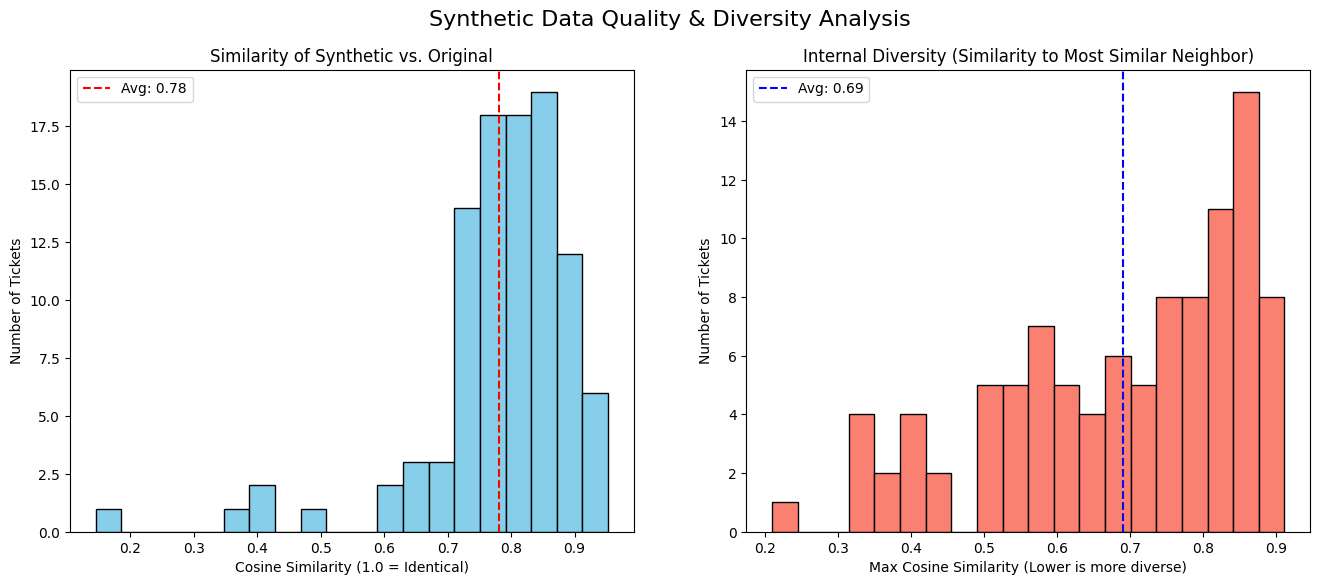



Performing Vocabulary Analysis (Top 15 Bi-grams)...

--- Original Seed Data ---       --- Synthetic Data ---
 1. ('your', 'account')       (54) | ('has', 'been')           (34)
 2. ('account', 'has')        (54) | ('unable', 'to')          (33)
 3. ('has', 'been')           (54) | ('locked', 'out')         (31)
 4. ('been', 'locked')        (54) | ('due', 'to')             (26)
 5. ('locked', 'out')         (54) | ('my', 'account')         (26)
 6. ('out', 'in')             (54) | ('been', 'locked')        (20)
 7. ('unable', 'to')          (11) | ('account', 'on')         (20)
 8. ('to', 'login')           (8) | ('access', 'to')          (17)
 9. ('in', 'hexmumsrv14')     (8) | ('to', 'access')          (17)
10. ('password', 'reset')     (6) | ('user', 'account')       (17)
11. ('hexmumsrv14', 'your')   (6) | ('account', 'has')        (16)
12. ('in', 'need')            (5) | ('i', 'am')               (15)
13. ('login', 'to')           (4) | ('to', 'my')              (14)
14. ('user'

In [ ]:
# --- Step 1: Install and Import Necessary Libraries ---
print("Installing required libraries...")
!pip install -U sentence-transformers nltk

import pandas as pd
from sentence_transformers import SentenceTransformer, util
import numpy as np
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import re

# Download required NLTK data packages
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True) # <-- THIS IS THE FIX
print("✓ Libraries installed and imported.")


# --- Step 2: Text Similarity Analysis ---
print("\nPerforming Text Similarity Analysis...")

# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Prepare the text from your DataFrame
original_descriptions = synthetic_df['short_description'].tolist()
synthetic_descriptions = synthetic_df['synthetic_description'].tolist()

# Generate numerical vectors (embeddings) for each description
original_embeddings = model.encode(original_descriptions, convert_to_tensor=True)
synthetic_embeddings = model.encode(synthetic_descriptions, convert_to_tensor=True)

# 2a: Calculate similarity of each synthetic ticket to its original seed
cosine_scores = util.cos_sim(original_embeddings, synthetic_embeddings)
similarity_to_seed = [cosine_scores[i][i].item() for i in range(len(original_descriptions))]

# 2b: Calculate internal similarity to check for diversity
internal_sim_matrix = util.cos_sim(synthetic_embeddings, synthetic_embeddings)
internal_sim_matrix.fill_diagonal_(-1)
max_internal_similarity = internal_sim_matrix.max(dim=1).values

print("✓ Similarity scores calculated.")


# --- Step 3: Visualize the Similarity Results ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.hist(similarity_to_seed, bins=20, color='skyblue', edgecolor='black')
ax1.set_title('Similarity of Synthetic vs. Original')
ax1.set_xlabel('Cosine Similarity (1.0 = Identical)')
ax1.set_ylabel('Number of Tickets')
ax1.axvline(np.mean(similarity_to_seed), color='r', linestyle='--', label=f'Avg: {np.mean(similarity_to_seed):.2f}')
ax1.legend()

ax2.hist(max_internal_similarity.cpu().numpy(), bins=20, color='salmon', edgecolor='black')
ax2.set_title('Internal Diversity (Similarity to Most Similar Neighbor)')
ax2.set_xlabel('Max Cosine Similarity (Lower is more diverse)')
ax2.set_ylabel('Number of Tickets')
ax2.axvline(max_internal_similarity.mean().item(), color='b', linestyle='--', label=f'Avg: {max_internal_similarity.mean():.2f}')
ax2.legend()

plt.suptitle('Synthetic Data Quality & Diversity Analysis', fontsize=16)
plt.show()


# --- Step 4: Vocabulary Analysis (N-Grams) ---
print("\n\nPerforming Vocabulary Analysis (Top 15 Bi-grams)...")

def get_top_ngrams(corpus, n=2, top_k=15):
    """Extracts top n-grams from a list of sentences."""
    corpus = [re.sub(r'[^a-zA-Z0-9\s]', '', str(text).lower()) for text in corpus]
    tokens = [word for text in corpus for word in nltk.word_tokenize(text)]
    all_ngrams = ngrams(tokens, n)
    return pd.DataFrame(Counter(all_ngrams).most_common(top_k), columns=['N-Gram', 'Count'])

original_bigrams = get_top_ngrams(original_descriptions, n=2)
synthetic_bigrams = get_top_ngrams(synthetic_descriptions, n=2)

print("\n--- Original Seed Data ---       --- Synthetic Data ---")
for i in range(min(15, len(original_bigrams), len(synthetic_bigrams))):
    orig_ngram = f"{original_bigrams.iloc[i]['N-Gram']}"
    orig_count = original_bigrams.iloc[i]['Count']
    synth_ngram = f"{synthetic_bigrams.iloc[i]['N-Gram']}"
    synth_count = synthetic_bigrams.iloc[i]['Count']
    print(f"{i+1:2d}. {orig_ngram:<25} ({orig_count}) | {synth_ngram:<25} ({synth_count})")

## Results So Far

So far this was just serving as a proof of concept to see how good gretel even is. I was able to get a good seed dataset from the raw data, then create the gretel generation pipeline, and then got decent results:

1.  **Quantitatively validated** that the resulting synthetic data is diverse, relevant, and high-quality, with an ideal similarity score (Avg: 0.78) and strong internal diversity (Avg: 0.69).
2.  The vocabulary analysis further proved that the model is generating **new, more natural, user-centric language.**
